In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

### 1. Dataset

In [174]:
dataset = pd.read_csv("../mouse_viral_study.csv")
dataset

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [175]:
X = dataset[['Med_1_mL', 'Med_2_mL']].values
y = dataset[['Virus Present']].values

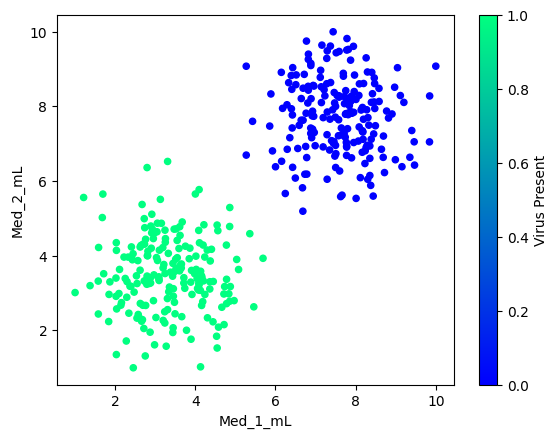

In [176]:
dataset.plot.scatter(x='Med_1_mL',y='Med_2_mL', c='Virus Present', colormap='winter')
plt.show()

### 2. Modèle


In [177]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [178]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [179]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [180]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [181]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [182]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [183]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 5. Modèle final

In [184]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

### Spliting dataset

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

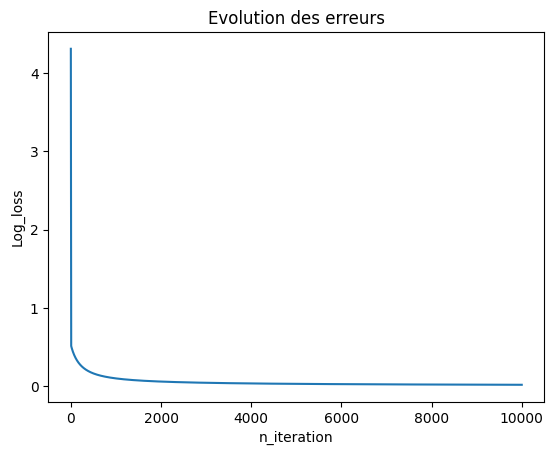

In [186]:
W, b = regression_logistique(X_train, y_train, learning_rate=0.1, n_iter=10000)


### 5. 1 Evaluation du modèle et Visualisation


In [187]:
from sklearn.metrics import accuracy_score

y_pred_test = predict(X_test, W, b)

# y_pred = predict(X_train[:320], W, b)
# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy =", accuracy)


[[8.49354477e-03]
 [9.94496126e-01]
 [5.98139553e-03]
 [4.48856936e-04]
 [9.73421080e-01]
 [4.58328736e-04]
 [1.61293665e-02]
 [9.87666883e-01]
 [9.88831477e-01]
 [1.98085583e-03]
 [9.84675323e-01]
 [9.88920785e-01]
 [2.31387723e-03]
 [2.11930888e-03]
 [9.95201642e-01]
 [9.50865652e-01]
 [9.47381479e-01]
 [3.43264526e-03]
 [8.87453110e-01]
 [5.97372132e-03]
 [9.98027876e-01]
 [6.68658621e-04]
 [9.13080084e-04]
 [1.37120650e-02]
 [5.94340363e-03]
 [7.21124491e-04]
 [2.47831851e-04]
 [9.98579587e-01]
 [1.23312549e-02]
 [4.04284494e-03]
 [9.97241516e-01]
 [6.99257979e-01]
 [9.97312477e-01]
 [1.16375185e-03]
 [4.37130860e-03]
 [2.00460414e-03]
 [8.05116456e-01]
 [9.91752494e-01]
 [1.75490890e-02]
 [9.65434320e-03]
 [9.82968320e-01]
 [1.51820757e-03]
 [9.94151223e-01]
 [5.08237066e-03]
 [7.82029663e-04]
 [9.92861799e-01]
 [1.88005633e-02]
 [9.99356967e-01]
 [1.94108114e-04]
 [5.59383292e-04]
 [9.88066199e-01]
 [9.60445176e-01]
 [1.18229608e-03]
 [9.96821331e-01]
 [7.84597530e-03]
 [9.960634

[0.99999842]
[ True]
[0.99999567]
[ True]
[0.99998926]
[ True]


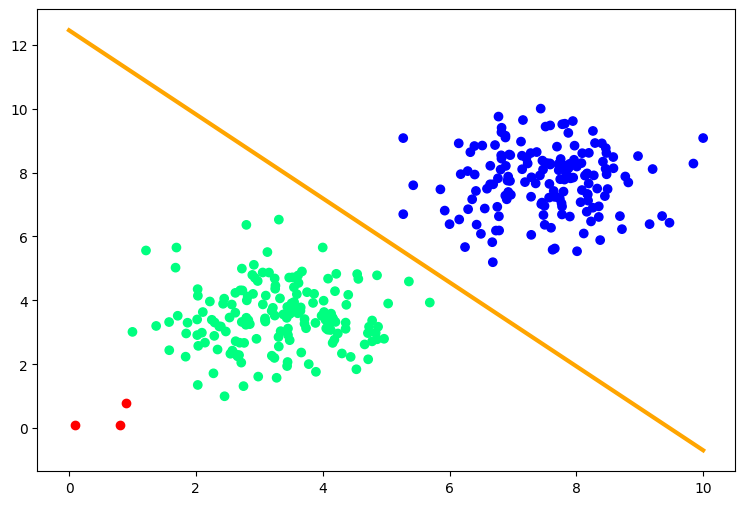

In [188]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([0.1,0.1])
new_2=np.array([0.8,0.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

[0.99999842]
[ True]
[0.99999567]
[ True]
[0.99998926]
[ True]


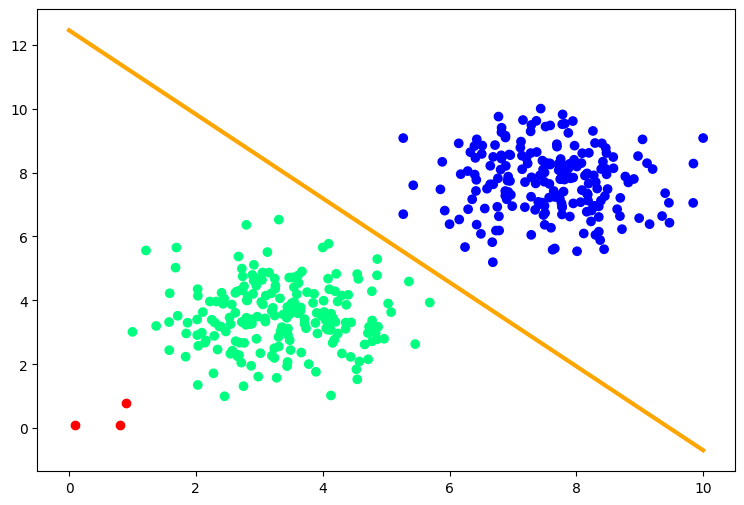

In [189]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([0.1,0.1])
new_2=np.array([0.8,0.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [190]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)
print(cm)

[[5.94340363e-03]
 [9.86915693e-01]
 [7.00716833e-02]
 [9.51292248e-01]
 [9.99828613e-01]
 [9.99451701e-01]
 [2.15155763e-03]
 [3.25924799e-03]
 [3.30797755e-02]
 [9.84675323e-01]
 [9.99325621e-01]
 [9.99077595e-01]
 [9.87491174e-01]
 [9.86576044e-01]
 [9.80102850e-01]
 [6.68658621e-04]
 [1.88617795e-02]
 [8.38013647e-03]
 [1.18058873e-02]
 [9.83028937e-01]
 [1.57563504e-02]
 [9.99478547e-01]
 [1.94108114e-04]
 [1.60888120e-03]
 [5.62125320e-02]
 [5.08237066e-03]
 [8.43187971e-01]
 [9.92636220e-01]
 [9.97682845e-01]
 [1.81754395e-03]
 [1.83883149e-03]
 [3.58896289e-04]
 [1.74288133e-01]
 [5.98139553e-03]
 [9.97677128e-01]
 [2.92097464e-03]
 [9.99554153e-01]
 [9.67399183e-01]
 [9.82728089e-01]
 [9.96063496e-01]
 [1.86103576e-03]
 [7.23679879e-03]
 [9.50865652e-01]
 [3.30470537e-03]
 [1.83647329e-03]
 [9.97364861e-01]
 [9.88066199e-01]
 [9.92339714e-01]
 [8.48479496e-01]
 [9.99328188e-01]
 [1.18932335e-03]
 [9.96857711e-01]
 [3.25789461e-03]
 [9.82187462e-04]
 [8.00250099e-03]
 [1.518207

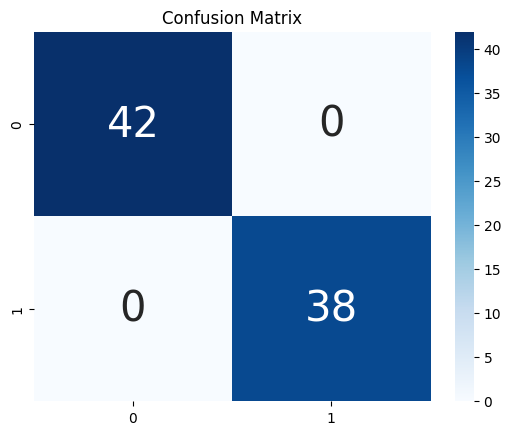

In [191]:
cm = confusion_matrix(y_test, y_pred_test)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d', cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix')
plt.show()